In [14]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

# Loading of data file

In [4]:
feat_file=pd.read_csv('cancer_mordred_preprocessed.csv')

In [5]:
feat_file.head()

,ABC,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VE2_A,VR1_A,VR3_A,...,JGI9,JGI10,JGT10,Diameter,TopoShapeIndex,SRW03,SRW05,TSRW10,WPath,mZagreb1
0,0.121378,0.0,0.0,0.165387,0.722883,0.785705,0.625380,0.172377,0.000007,0.325947,...,0.000000,0.000000,0.570573,8.000000e-08,0.60,0.0,0.000000,0.255696,1.210999e-09,0.142857
1,0.187982,0.2,0.2,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.460767,0.614607,0.593865,1.000000e+00,0.00,0.0,0.555084,0.412322,1.242729e-02,0.133016
2,0.161982,0.0,0.0,0.232151,0.766968,0.882304,0.685177,0.152569,0.000011,0.359675,...,0.000000,0.000000,0.431425,8.000000e-08,1.00,0.0,0.000000,0.335127,1.919619e-09,0.125236
3,0.150052,0.1,0.0,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.000000,0.000000,0.502729,1.000000e+00,0.00,0.0,0.437189,0.361216,1.586462e-02,0.153556
4,0.073037,0.0,0.0,0.115319,0.672574,0.876552,0.525463,0.248485,0.000004,0.264019,...,0.000000,0.000000,0.267857,7.000000e-08,0.75,0.0,0.000000,0.204382,3.516658e-10,0.053493


In [6]:
feat_file.shape

(2129, 820)

In [7]:
X=feat_file.values

In [8]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [9]:
y=label.values.ravel()

# split


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [11]:
X_train.shape

(1703, 820)

In [12]:
y_train.shape

(1703,)

# Selecting features through RFE.

In [15]:
rfe_method = RFE(
    RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=129,
    step=2,
)

In [16]:
rfe_method.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=129, step=2)

In [17]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

# To see selected features

In [18]:
print("The optimal number of features:", rfe_method.n_features_)
print("Best features:", X_train.columns[rfe_method.support_])

The optimal number of features: 129
Best features: Int64Index([ 34,  35,  36,  47,  64,  73,  83,  89,  92,  97,
            ...
            648, 649, 650, 653, 654, 655, 656, 662, 704, 705],
           dtype='int64', length=129)


In [21]:
selected_feat_names = list(feat_file.columns[rfe_method.support_])

In [22]:
train_x = pd.DataFrame(X_train)
test_x = pd.DataFrame(X_test)

In [23]:
train_x.columns=feat_file.columns
test_x.columns=feat_file.columns

In [24]:
new_df=train_x.loc[:,selected_feat_names]
X_train_filtered=new_df

new_df_test=test_x.loc[:,selected_feat_names]
X_test_filtered=new_df_test

In [26]:
new_df.shape

(1703, 129)

In [28]:
new_df.to_csv('rfe_train_mordred.csv',index=False)
new_df_test.to_csv('rfe_test_mordred.csv',index=False)

In [29]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [30]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_train_filtered)
y_pred = km.labels_

/home/ahujalab4/.conda/envs/asvm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train_filtered,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

In [32]:
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})

In [33]:
data

,Clustering_scores,Scores
0,silhouette_score,0.004729
1,adjusted_rand_score,0.003647
2,normalized_mutual_info_score,0.004065


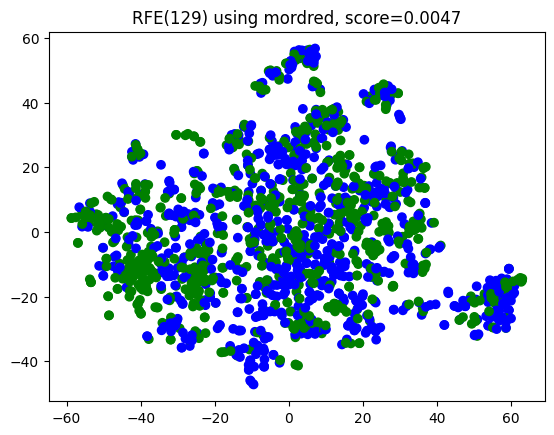

In [34]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_train_filtered)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

#plt.legend()

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('RFE(129) using mordred, score=0.0047')
plt.show()

## RFC

In [35]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values_train=forest.predict_proba(X_train_filtered)
y_prediction_values_test=forest.predict_proba(X_test_filtered)

In [36]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

rfc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
rfc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[147  52]
 [ 88 139]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6255    0.7387    0.6774       199
           1     0.7277    0.6123    0.6651       227

    accuracy                         0.6714       426
   macro avg     0.6766    0.6755    0.6712       426
weighted avg     0.6800    0.6714    0.6708       426



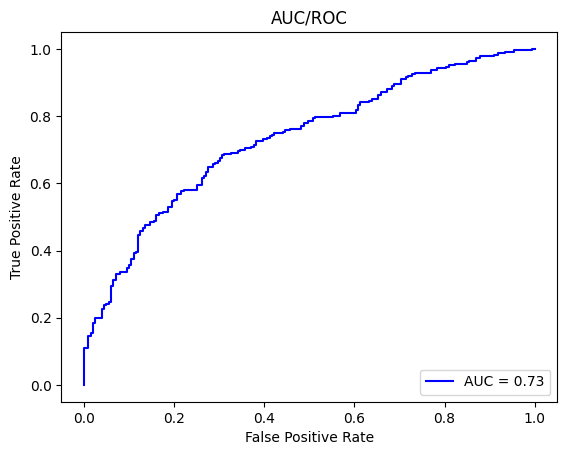

In [37]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)


y_prediction_values_train=KNN.predict_proba(X_train_filtered)
y_prediction_values_test=KNN.predict_proba(X_test_filtered)


In [39]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

knn_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
knn_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[127  72]
 [ 71 156]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6414    0.6382    0.6398       199
           1     0.6842    0.6872    0.6857       227

    accuracy                         0.6643       426
   macro avg     0.6628    0.6627    0.6628       426
weighted avg     0.6642    0.6643    0.6643       426



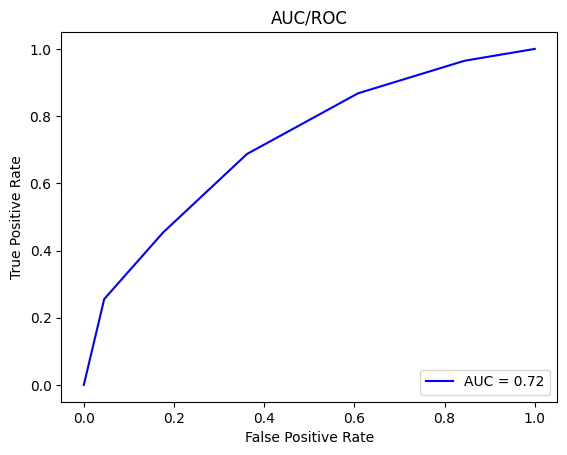

In [40]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [41]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)

y_prediction_values_train=model.predict_proba(X_train_filtered)
y_prediction_values_test=model.predict_proba(X_test_filtered)

In [42]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


svc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
svc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[128  71]
 [ 66 161]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6598    0.6432    0.6514       199
           1     0.6940    0.7093    0.7015       227

    accuracy                         0.6784       426
   macro avg     0.6769    0.6762    0.6765       426
weighted avg     0.6780    0.6784    0.6781       426



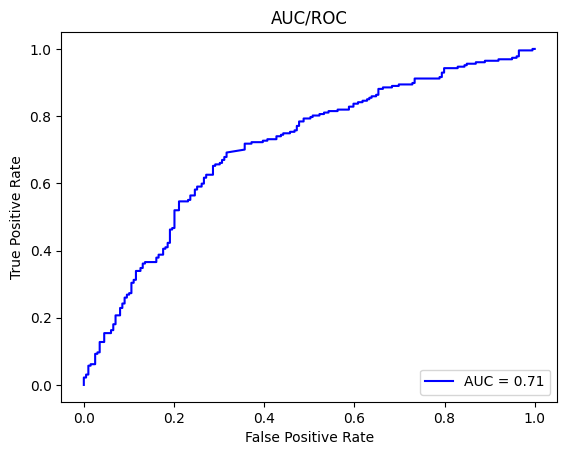

In [43]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)

y_prediction_values_train=lr.predict_proba(X_train_filtered)
y_prediction_values_test=lr.predict_proba(X_test_filtered)                                     

/home/ahujalab4/.conda/envs/asvm/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

lr_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lr_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[127  72]
 [ 72 155]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6382    0.6382    0.6382       199
           1     0.6828    0.6828    0.6828       227

    accuracy                         0.6620       426
   macro avg     0.6605    0.6605    0.6605       426
weighted avg     0.6620    0.6620    0.6620       426



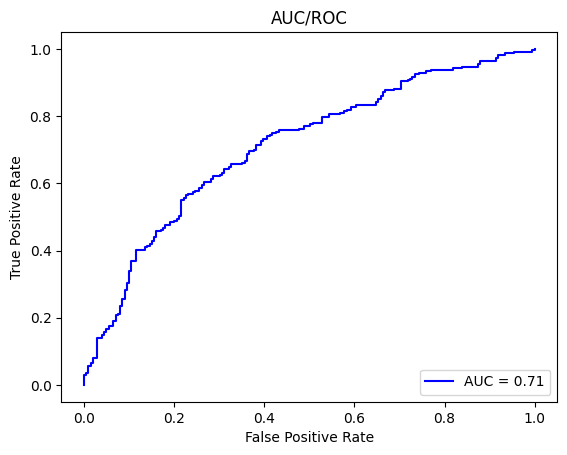

In [46]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values_train=xgb.predict_proba(X_train_filtered)
y_prediction_values_test=xgb.predict_proba(X_test_filtered)

[10:52:09] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [48]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)

xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)



xgb_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
xgb_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[143  56]
 [ 72 155]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6651    0.7186    0.6908       199
           1     0.7346    0.6828    0.7078       227

    accuracy                         0.6995       426
   macro avg     0.6999    0.7007    0.6993       426
weighted avg     0.7021    0.6995    0.6998       426



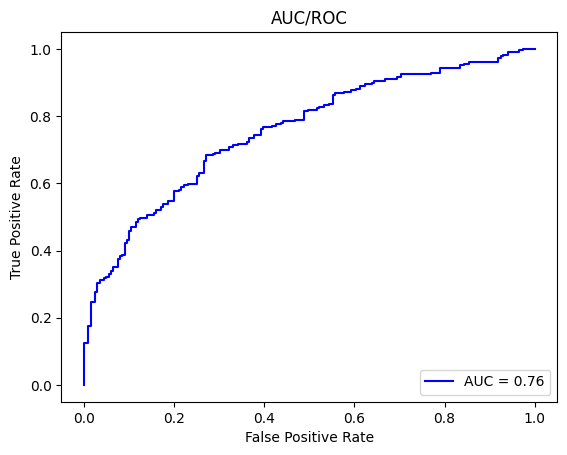

In [49]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [50]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values_train=clf.predict_proba(X_train_filtered)
y_prediction_values_test=clf.predict_proba(X_test_filtered)

In [51]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

clf_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
clf_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 70 129]
 [ 42 185]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6250    0.3518    0.4502       199
           1     0.5892    0.8150    0.6839       227

    accuracy                         0.5986       426
   macro avg     0.6071    0.5834    0.5670       426
weighted avg     0.6059    0.5986    0.5747       426



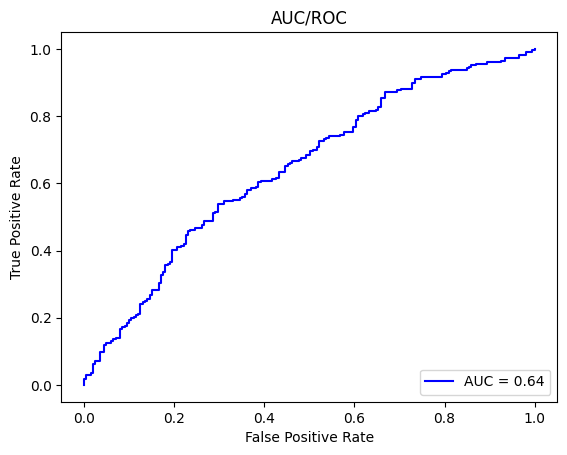

In [52]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [53]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values_train=mlp.predict_proba(X_train_filtered)
y_prediction_values_test=mlp.predict_proba(X_test_filtered)

In [54]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)

mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


mlp_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
mlp_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[135  64]
 [ 69 158]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6618    0.6784    0.6700       199
           1     0.7117    0.6960    0.7038       227

    accuracy                         0.6878       426
   macro avg     0.6867    0.6872    0.6869       426
weighted avg     0.6884    0.6878    0.6880       426



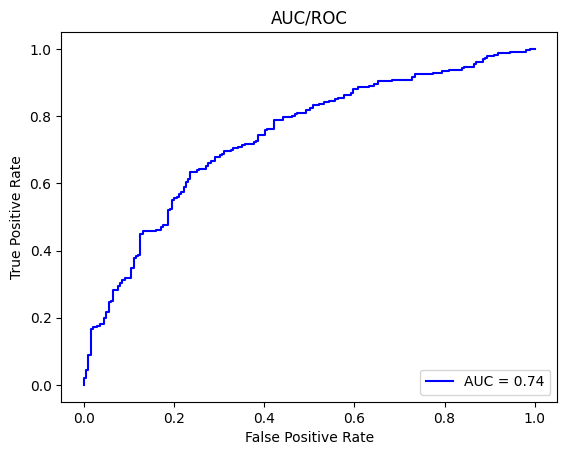

In [55]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values_train=etc.predict_proba(X_train_filtered)
y_prediction_values_test=etc.predict_proba(X_test_filtered)

In [57]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)

etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

etc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
etc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[143  56]
 [ 64 163]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6908    0.7186    0.7044       199
           1     0.7443    0.7181    0.7309       227

    accuracy                         0.7183       426
   macro avg     0.7176    0.7183    0.7177       426
weighted avg     0.7193    0.7183    0.7186       426



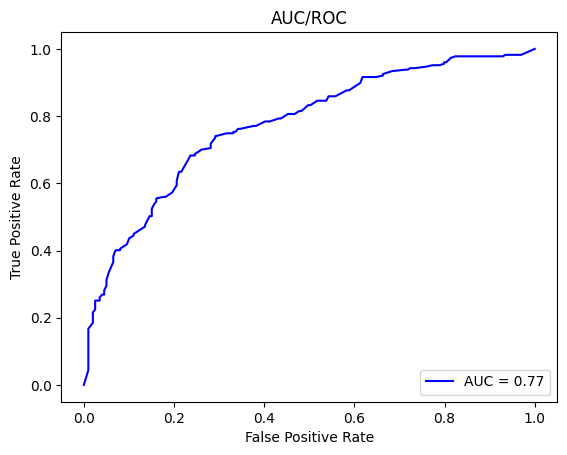

In [58]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [59]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)

y_prediction_values_train=dtc.predict_proba(X_train_filtered)
y_prediction_values_test=dtc.predict_proba(X_test_filtered)                           

In [60]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)

dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

dtc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
dtc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 84 115]
 [ 67 160]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5563    0.4221    0.4800       199
           1     0.5818    0.7048    0.6375       227

    accuracy                         0.5728       426
   macro avg     0.5691    0.5635    0.5587       426
weighted avg     0.5699    0.5728    0.5639       426



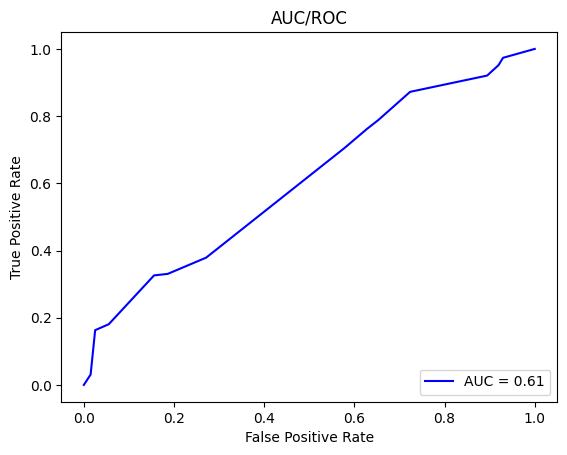

In [61]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)

y_prediction_values_train=lda.predict_proba(X_train_filtered)
y_prediction_values_test=lda.predict_proba(X_test_filtered)
                                                        

In [63]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)

lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


lda_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lda_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[136  63]
 [ 76 151]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6415    0.6834    0.6618       199
           1     0.7056    0.6652    0.6848       227

    accuracy                         0.6737       426
   macro avg     0.6736    0.6743    0.6733       426
weighted avg     0.6757    0.6737    0.6741       426



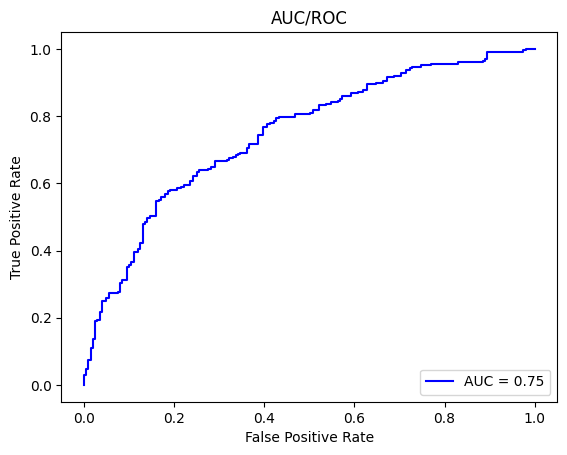

In [64]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [65]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC_train':[rfc_auc_train,knn_auc_train,svc_auc_train,lr_auc_train,xgb_auc_train,clf_auc_train,mlp_auc_train,etc_auc_train,dtc_auc_train,lda_auc_train]}
df_train = pd.DataFrame(data_train)

In [66]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa_test],
               'AUC/ROC_test':[rfc_auc_test,knn_auc_test,svc_auc_test,lr_auc_test,xgb_auc_test,clf_auc_test,mlp_auc_test,etc_auc_test,dtc_auc_test,lda_auc_test]}
             
df_test = pd.DataFrame(data_test)             

In [67]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC_train
0,RFC,81.796829,0.640331,0.817873,0.860229,0.771950,0.636761,0.910110
1,KNN,80.211392,0.603795,0.801884,0.805430,0.811859,0.603775,0.882617
2,SVC,68.115091,0.361228,0.680048,0.680346,0.718358,0.360627,0.755536
3,LR,66.823253,0.335509,0.667671,0.674107,0.688712,0.335425,0.740057
4,XGB,99.706400,0.994128,0.997061,0.995455,0.998860,0.994122,0.999965
5,GNB,59.718144,0.207204,0.566800,0.574785,0.836944,0.182124,0.666988
6,MLP,79.624193,0.591992,0.795917,0.796421,0.811859,0.591874,0.886902
7,ETC,99.765120,0.995298,0.997649,0.997719,0.997719,0.995298,0.999986
8,DTC,69.817968,0.412982,0.686478,0.657143,0.865450,0.389847,0.783796
9,LDA,70.992366,0.418969,0.709233,0.710671,0.736602,0.418672,0.785356


In [68]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC_test
0,RFC,67.136150,0.352153,0.671246,0.727749,0.612335,0.347155,0.731543
1,KNN,66.431925,0.325520,0.662756,0.684211,0.687225,0.325517,0.719080
2,SVC,67.840376,0.353113,0.676462,0.693966,0.709251,0.353014,0.707237
3,LR,66.197183,0.321010,0.660505,0.682819,0.682819,0.321010,0.709163
4,XGB,69.953052,0.400562,0.699292,0.734597,0.682819,0.399432,0.756160
5,GNB,59.859155,0.188972,0.567040,0.589172,0.814978,0.171357,0.644500
6,MLP,68.779343,0.373952,0.686881,0.711712,0.696035,0.373848,0.738782
7,ETC,71.830986,0.435883,0.717688,0.744292,0.718062,0.435575,0.772940
8,DTC,57.276995,0.132416,0.558725,0.581818,0.704846,0.128874,0.608671
9,LDA,67.370892,0.347865,0.673304,0.705607,0.665198,0.347216,0.745954
